## Predictive Model

In [37]:
!pip install imblearn

In [38]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

from imblearn.ensemble import RUSBoostClassifier

In [39]:
# Reading the case database
df = pd.read_csv("/content/ml_project1_data.csv")

In [40]:
df.head(3).T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,2012-09-04,2014-03-08,2013-08-21
Recency,58,38,26
MntWines,635,11,426


## Data Cleaning

In [41]:
df.drop('ID', axis=1, inplace=True)
df.shape

(2240, 28)

## Looking for columns with constant values

In [42]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [43]:
# dropping the Z_CostContact and Z_Revenue columns.

df.drop(  columns=[ 'Z_CostContact', 'Z_Revenue' ], inplace=True )

## Looking for null values

In [44]:
# Fetching columns with more null values (Income).

df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [45]:
df.dropna(axis=0, inplace=True)

## Checking column types

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

In [47]:
# Transforming Dt_customer column type to date format.

df['Dt_Customer'] = pd.to_datetime( df['Dt_Customer'] )

## Checking data sanity

In [48]:
df['Marital_Status'].value_counts() 

# doing the same check on other variables helps to make our model more reliable. 

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [49]:
df.shape

(2216, 26)

In [50]:
# Dropping strange values
df = df[ ( df['Marital_Status'] != 'Alone' ) & (df['Marital_Status'] != 'Absurd' )  & (df['Marital_Status'] != 'YOLO' ) ]

# Attribute Engineering

1. Year_Birth: will be converted to age.
2. Dt_Customer: will become time as a customer.

In [51]:
# Converting Year_Birth to Age.

ano_atual = pd.datetime.now().year
df['Age'] = ano_atual - df['Year_Birth']
df.drop('Year_Birth', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,4,7,0,0,0,0,0,0,1,65
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,2,5,0,0,0,0,0,0,0,68


In [53]:
# Converting Dt_Customer to time as a customer.

data_atual = pd.datetime.now().date()
df['Time_Customer'] = data_atual - df['Dt_Customer'].dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [54]:
df['Time_Customer'] = df['Time_Customer']/np.timedelta64(1, 'Y')
df.drop('Dt_Customer', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Time_Customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,65,9.683977
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,68,8.178128


## Preparation for modeling

In [56]:
X = df.drop(columns=['Response'])
y = df['Response']

In [57]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42 )

In [58]:
ct = ColumnTransformer(
[ ("norm1", OneHotEncoder(), [ 'Marital_Status', 'Education'])  ], remainder='passthrough')

In [59]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Using Random Forest

In [60]:
modelo_rf = RandomForestClassifier()
modelo_rf.fit( X_train, y_train)
y_pred_modelo_rf = modelo_rf.predict(X_test)

0.3333333333333333


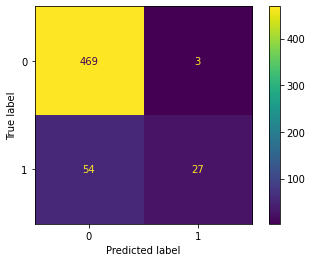

In [61]:
cm = confusion_matrix(y_test, y_pred_modelo_rf, labels=modelo_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo_rf.classes_)
disp.plot()
print(recall_score( y_test,  y_pred_modelo_rf))

## RF using class_weights

In [62]:
modelo_rf2 =  RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
modelo_rf2.fit( X_train, y_train)
y_pred_modelo_rf2 = modelo_rf2.predict(X_test)

0.6419753086419753


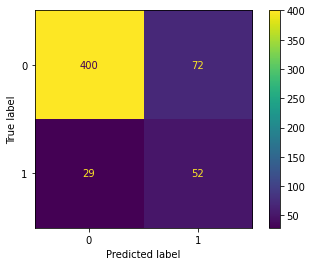

In [63]:
cm = confusion_matrix(y_test, y_pred_modelo_rf2, labels=modelo_rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo_rf2.classes_)
disp.plot()
print(recall_score( y_test,  y_pred_modelo_rf2))

# This was the best model found for the next campaign

# Possible next steps:

1. Return to feature engineering: divide the purchase features and numdeals by customer time, add the campaigns the customer participated in, unite some dummies variables (marital status and education)

2. Make feature selection (using boruta)

3. Search for hyperparameters.

4. Test other models (maybe something simpler like logistic regression)

5. Use another probability threshold.

6. Do a residual analysis.